# IBMFA Simulator for target control
We start with the T-LGL leukemia example from the original repo, then explore altering it to have a particular context (the bistable one we are exploring in our target control work). Then, we do single node interventions - testing both ON and OFF values for each node in teh network, excepting the seed set and our target (Apoptosis). 

Results are presented in graphical form - time series of simulations and histograms of apoptosis in particular. Then, we save out the data to csv an pickle files!

NOTE - runs in Python 2.7 and with old CANA

In [1]:
#matplotlib
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#import basic modules
import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
#copy CANA datasets into this directory if the package fails to install (package requires Microsoft Visual C++)
#import cana
from cana.boolean_node import *
from cana.boolean_network import *

In [4]:
#import scripts
from utils import *
from modules import *
import mean_field_computations
from mean_field_computations import *
from brute_force_computations import *
from simulations import *
from entropy_computations import *
from driver_sets import *

#### Run simulator from the IM repo

In [5]:
N=BooleanNetwork.from_file('leukemia.txt',file_type='logical') #may be any file in logical form

In [6]:
#reduce the look-up-table and find all sunits (i.e. node states) in the network
dd={node.name: LUT_reduce(look_up_table(node)) for node in N.nodes}
nodes=dd.keys()
print(len(dd),nodes)
modules,translator={},{}
sunits,sunit_map=get_sunits(N)
print(len(sunits),sunit_map)

(60, ['TAX', 'FasT', 'FYN', 'SPHK1', 'FLIP', 'PLCG1', 'DISC', 'TPL2', 'Stimuli2', 'ERK', 'Proliferation', 'STAT3', 'IL2RBT', 'Fas', 'BID', 'TCR', 'Caspase', 'TRADD', 'GAP', 'CD45', 'GPCR', 'PDGF', 'ZAP70', 'FasL', 'IL15', 'SOCS', 'RAS', 'P2', 'CTLA4', 'sFas', 'Cytoskeleton_signaling', 'PI3K', 'IFNG', 'Stimuli', 'S1P', 'PDGFR', 'TNF', 'JAK', 'SMAD', 'IFNGT', 'BclxL', 'IAP', 'NFAT', 'A20', 'IL2RA', 'IL2RB', 'GZMB', 'NFKB', 'Ceramide', 'TBET', 'MEK', 'P27', 'GRB2', 'IL2', 'Apoptosis', 'CREB', 'RANTES', 'LCK', 'IL2RAT', 'MCL1'])
(120, {0: 'CTLA4-0', 1: 'CTLA4-1', 2: 'TCR-0', 3: 'TCR-1', 4: 'PDGFR-0', 5: 'PDGFR-1', 6: 'FYN-0', 7: 'FYN-1', 8: 'Cytoskeleton_signaling-0', 9: 'Cytoskeleton_signaling-1', 10: 'LCK-0', 11: 'LCK-1', 12: 'ZAP70-0', 13: 'ZAP70-1', 14: 'GRB2-0', 15: 'GRB2-1', 16: 'PLCG1-0', 17: 'PLCG1-1', 18: 'RAS-0', 19: 'RAS-1', 20: 'GAP-0', 21: 'GAP-1', 22: 'MEK-0', 23: 'MEK-1', 24: 'ERK-0', 25: 'ERK-1', 26: 'PI3K-0', 27: 'PI3K-1', 28: 'NFKB-0', 29: 'NFKB-1', 30: 'NFAT-0', 31: 'NFA

In [7]:
# seed=[108, 111, 113, 114, 116, 118] # seed nodes for pro-oncogenic bi-stable state
seed = [108]
for node in seed:
    print(sunit_map[node])

PDGF-0


In [8]:
# synchronous_mf(N,sunit_map, )
# def synchronous_mf(N,act_nodes,act_prob,iterations=10,pinning=set([]),reduced=False,ds=None,pin_start=True):
# reload(mean_field_computations)
# from mean_field_computations import *
seed=seed
iterations=20
IBMFA = run_seed_mf(N,seed,sunit_map,translator,p=0.5,iterations=iterations,pinning=set([]),reduced=False,ds=None,pin_start=True,
            update='asynchronous',order=None,regenerate=False,oh=False,names='string')
# def run_seed_mf(N,seed,sunit_map,translator,p=0.5,iterations=10,pinning=set([]),reduced=False,ds=None,pin_start=True,
#             update='synchronous',order=None,regenerate=False,oh=False,names='string'):

In [9]:
print(sorted([(n,v) for n,v in IBMFA[iterations].items()],key=lambda x: x[0],reverse=False))


[('A20', 0.8671573767809108), ('Apoptosis', 0.9987265310975184), ('BID', 0.9960561572464187), ('BclxL', 3.0771758764305305e-08), ('CD45', 0.5), ('CREB', 0.13405371306278832), ('CTLA4', 0.33333349227905273), ('Caspase', 0.9987304249485707), ('Ceramide', 0.8420517543044604), ('Cytoskeleton_signaling', 0.4226872417803802), ('DISC', 0.8281618378990533), ('ERK', 0.2681071273278741), ('FLIP', 0.15050150810077415), ('FYN', 0.4227023252312949), ('Fas', 0.8420072462102277), ('FasL', 0.9709933151706347), ('FasT', 0.8671573767809108), ('GAP', 0.2588537285894793), ('GPCR', 1.6753052632190962e-14), ('GRB2', 0.45100229435805156), ('GZMB', 0.9999693732704794), ('IAP', 0.0034199102668375945), ('IFNG', 0.5000003441024856), ('IFNGT', 0.9999902076174847), ('IL15', 0.5), ('IL2', 5.0962276747798016e-05), ('IL2RA', 3.853444944734916e-09), ('IL2RAT', 4.6774092551437397e-05), ('IL2RB', 0.13405328138915618), ('IL2RBT', 0.2680929001537406), ('JAK', 0.3813839059782473), ('LCK', 0.6339889323729282), ('MCL1', 0.00

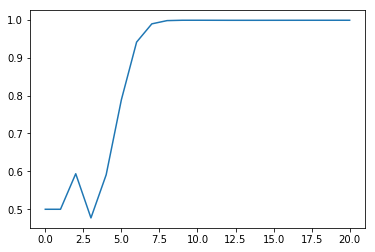

In [10]:
plt.plot([IBMFA[time]['Apoptosis'] for time in IBMFA])

### Single node interventions

This is without context. With these simulations, any node can take on any value - the outputs aren't set. 

In [11]:
single_node_interventions = {}
for node in sunit_map.keys():
    # print(node)
    seed = [node]
    iterations=20
    IBMFA_temp = run_seed_mf(N,seed,sunit_map,translator,p=0.5,iterations=iterations,pinning=set([]),reduced=False,ds=None,pin_start=True,
            update='asynchronous',order=None,regenerate=False,oh=False,names='string')
#     print(sorted([(n,v) for n,v in IBMFA_temp[iterations].items()],key=lambda x: x[0],reverse=False))
    print(node)
    single_node_interventions[node] = IBMFA_temp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


Lets graph the results. The final "time point" will let us know if the node of interest (Apoptosis) converged. 

I say time point because this is iterating a simulator that doesn't have a concept of time - but it does "step" or iterate. 

Text(0,0.5,'Apoptosis node value')

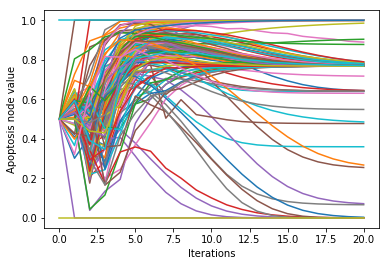

In [12]:
for node in single_node_interventions.keys():
    plt.plot([single_node_interventions[node][time]['Apoptosis'] for time in single_node_interventions[node]])

plt.xlabel('Iterations')
plt.ylabel('Apoptosis node value')

### Playing with the simulator and IBMFA interface to start to get network in proper state

In [13]:
select_seeds = [108, 111, 113, 114, 116, 118]

Playing with just setting the seed nodes. A "seed node" is a node that is set to 0 or 1 at the beginning of the simulation.

In [14]:
select_single_node_interventions = {}
for node in select_seeds:
    # print(node)
    seed = [node]
    iterations=20
    IBMFA_temp = run_seed_mf(N,seed,sunit_map,translator,p=0.5,iterations=iterations,pinning=set([]),reduced=False,ds=None,pin_start=True,
            update='asynchronous',order=None,regenerate=False,oh=False,names='string')
#     print(sorted([(n,v) for n,v in IBMFA_temp[iterations].items()],key=lambda x: x[0],reverse=False))
    print(node, sunit_map[node])
    select_single_node_interventions[node] = IBMFA_temp

(108, 'PDGF-0')
(111, 'IL15-1')
(113, 'Stimuli-1')
(114, 'Stimuli2-0')
(116, 'CD45-0')
(118, 'TAX-0')


Text(0,0.5,'Apoptosis node value')

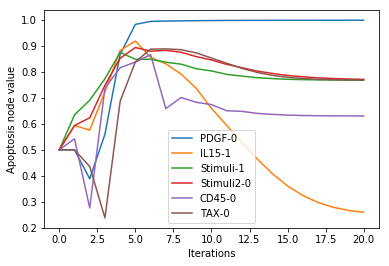

In [15]:
for node in select_single_node_interventions.keys():
    plt.plot([select_single_node_interventions[node][time]['Apoptosis'] for time in select_single_node_interventions[node]], label = sunit_map[node])

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Apoptosis node value')


Testing how we are going to get our single node interventions set. 

In [16]:
seed = [108]
print(select_seeds+seed)

[108, 111, 113, 114, 116, 118, 108]


## Set context (bistable context) single node interventions

This is the real part! This is where we are doing the simulations to test single intervention target controls. 

In [17]:
bistable_context_seed = [108, 111, 113, 114, 116, 118]

Run the simulator!!! 

The loop below runs each single node intervention one at a time. The simulator produces a "time" series in the sense that it iterates through the solver _iterations_ number of times. Within each step through the solver, the whole network (each node/variable) takes on a value inclusively between 0 and 1. The values of each node/variable are recorded at each time step. So - the output dictionary ends up with approximately as many time courses in it as there are number of nodes in the network * 2 (one for ON and one for OFF). The length of the time courses is equal to _iterations_ plus 1 (for time 0) and finally each time step has as many members as there are number of variables in the network. All are stored as dictionaries. 

Summary:
 - ~2 * size of network time series produced - keyed to variable name in sunit_map, which is the node name with `-0` or `-1` appended to it
 - _iterations_ + 1 steps in each time series - keyed to the time step (which are always discrete - so integers)
 - N number of variables output at each step in the time series - keyed to the node name

For futher analysis - considering storing sunit_map!!! It might be helpful to ensure reproducibility!

In [18]:
bistable_context_single_node_interventions = {}
for int_ID, node in sunit_map.items():
    # print(node)
    if int_ID in bistable_context_seed or int_ID == 98 or int_ID == 99: # 98 and 99 are Apoptosis off and on respectivelly. 
        continue
    seed = bistable_context_seed + [int_ID]
    iterations=20
    IBMFA_temp = run_seed_mf(N,seed,sunit_map,translator,p=0.5,iterations=iterations,pinning=set([]),reduced=False,ds=None,pin_start=True,
            update='asynchronous',order=None,regenerate=False,oh=False,names='string')
#     print(sorted([(n,v) for n,v in IBMFA_temp[iterations].items()],key=lambda x: x[0],reverse=False))
    print(seed)
    print(IBMFA_temp[iterations]['Apoptosis'])
    bistable_context_single_node_interventions[node] = IBMFA_temp

[108, 111, 113, 114, 116, 118, 0]
1.0
[108, 111, 113, 114, 116, 118, 1]
1.0
[108, 111, 113, 114, 116, 118, 2]
1.0
[108, 111, 113, 114, 116, 118, 3]
0.999807560577
[108, 111, 113, 114, 116, 118, 4]
0.999999999625
[108, 111, 113, 114, 116, 118, 5]
0.0
[108, 111, 113, 114, 116, 118, 6]
1.0
[108, 111, 113, 114, 116, 118, 7]
1.0
[108, 111, 113, 114, 116, 118, 8]
1.0
[108, 111, 113, 114, 116, 118, 9]
1.0
[108, 111, 113, 114, 116, 118, 10]
0.996231132968
[108, 111, 113, 114, 116, 118, 11]
1.0
[108, 111, 113, 114, 116, 118, 12]
1.0
[108, 111, 113, 114, 116, 118, 13]
1.0
[108, 111, 113, 114, 116, 118, 14]
0.999999849913
[108, 111, 113, 114, 116, 118, 15]
1.0
[108, 111, 113, 114, 116, 118, 16]
0.997874358015
[108, 111, 113, 114, 116, 118, 17]
1.0
[108, 111, 113, 114, 116, 118, 18]
0.999969226733
[108, 111, 113, 114, 116, 118, 19]
1.0
[108, 111, 113, 114, 116, 118, 20]
1.0
[108, 111, 113, 114, 116, 118, 21]
0.999984067771
[108, 111, 113, 114, 116, 118, 22]
1.0
[108, 111, 113, 114, 116, 118, 23]
1

### Plot the new results
These results are very different than when there are no inputs set. Almost all inventerventions go to Apoptosis ON

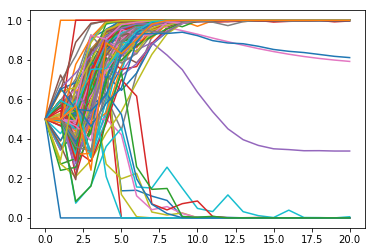

In [19]:
for node in bistable_context_single_node_interventions.keys():
    plt.plot([bistable_context_single_node_interventions[node][time]['Apoptosis'] for time in bistable_context_single_node_interventions[node]])

Lets look at the reulsts as a histogram.

We have to get ALL the apoptosis results into one dataframe - so we loop through the whole output dictionary node by node. 


In [20]:
print(bistable_context_single_node_interventions.keys())

['Ceramide-0', 'SMAD-0', 'SMAD-1', 'PDGFR-1', 'PDGFR-0', 'Cytoskeleton_signaling-0', 'Cytoskeleton_signaling-1', 'STAT3-1', 'STAT3-0', 'ERK-0', 'ERK-1', 'Stimuli-0', 'IL2-1', 'IL2-0', 'TBET-0', 'TBET-1', 'IL2RAT-1', 'IL2RAT-0', 'NFAT-0', 'NFAT-1', 'CTLA4-0', 'CTLA4-1', 'BclxL-1', 'BclxL-0', 'TRADD-1', 'TRADD-0', 'SOCS-1', 'SOCS-0', 'ZAP70-1', 'Proliferation-0', 'Proliferation-1', 'GAP-0', 'GAP-1', 'IL2RBT-0', 'IL2RBT-1', 'FYN-1', 'FYN-0', 'sFas-0', 'sFas-1', 'IL15-0', 'FLIP-0', 'MCL1-1', 'FLIP-1', 'ZAP70-0', 'IFNGT-1', 'FasL-1', 'FasL-0', 'Stimuli2-1', 'PDGF-1', 'DISC-0', 'PI3K-0', 'PI3K-1', 'IAP-1', 'LCK-0', 'LCK-1', 'CREB-1', 'CREB-0', 'BID-1', 'BID-0', 'IFNGT-0', 'Caspase-0', 'Caspase-1', 'MCL1-0', 'Fas-0', 'Fas-1', 'P27-1', 'P27-0', 'TAX-1', 'S1P-0', 'S1P-1', 'CD45-1', 'GRB2-0', 'GRB2-1', 'TPL2-0', 'MEK-1', 'MEK-0', 'NFKB-0', 'NFKB-1', 'GPCR-1', 'GPCR-0', 'SPHK1-1', 'SPHK1-0', 'TNF-0', 'TNF-1', 'IL2RA-0', 'IL2RA-1', 'RANTES-0', 'RANTES-1', 'A20-1', 'A20-0', 'PLCG1-1', 'FasT-1', 'Fa

        Apoptosis
count  112.000000
mean     0.892293
std      0.303226
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
            Apoptosis
Ceramide-0   0.000003
SMAD-0       1.000000
SMAD-1       1.000000
PDGFR-1      0.000000
PDGFR-0      1.000000


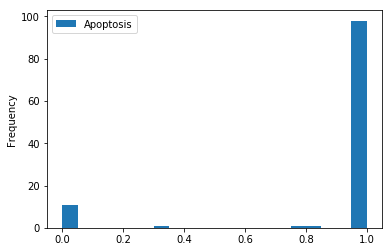

In [21]:
# Plot histogram of Apoptosis values for the last time point for each node

df_results = pd.DataFrame([bistable_context_single_node_interventions[node][20]['Apoptosis'] for node in bistable_context_single_node_interventions.keys()], 
                          index=bistable_context_single_node_interventions.keys(), columns=['Apoptosis'])
print(df_results.describe())
print(df_results.head())

df_results.plot.hist(bins=20)


### Save out data

Saving the mapping of s units (the variables in the IBMFA simulator) to their indices. This could vary if the network variable loading was altered, so its important to preserve. 

In [22]:
print(sunit_map)

{0: 'CTLA4-0', 1: 'CTLA4-1', 2: 'TCR-0', 3: 'TCR-1', 4: 'PDGFR-0', 5: 'PDGFR-1', 6: 'FYN-0', 7: 'FYN-1', 8: 'Cytoskeleton_signaling-0', 9: 'Cytoskeleton_signaling-1', 10: 'LCK-0', 11: 'LCK-1', 12: 'ZAP70-0', 13: 'ZAP70-1', 14: 'GRB2-0', 15: 'GRB2-1', 16: 'PLCG1-0', 17: 'PLCG1-1', 18: 'RAS-0', 19: 'RAS-1', 20: 'GAP-0', 21: 'GAP-1', 22: 'MEK-0', 23: 'MEK-1', 24: 'ERK-0', 25: 'ERK-1', 26: 'PI3K-0', 27: 'PI3K-1', 28: 'NFKB-0', 29: 'NFKB-1', 30: 'NFAT-0', 31: 'NFAT-1', 32: 'RANTES-0', 33: 'RANTES-1', 34: 'IL2-0', 35: 'IL2-1', 36: 'IL2RBT-0', 37: 'IL2RBT-1', 38: 'IL2RB-0', 39: 'IL2RB-1', 40: 'IL2RAT-0', 41: 'IL2RAT-1', 42: 'IL2RA-0', 43: 'IL2RA-1', 44: 'JAK-0', 45: 'JAK-1', 46: 'SOCS-0', 47: 'SOCS-1', 48: 'STAT3-0', 49: 'STAT3-1', 50: 'P27-0', 51: 'P27-1', 52: 'Proliferation-0', 53: 'Proliferation-1', 54: 'TBET-0', 55: 'TBET-1', 56: 'CREB-0', 57: 'CREB-1', 58: 'IFNGT-0', 59: 'IFNGT-1', 60: 'IFNG-0', 61: 'IFNG-1', 62: 'P2-0', 63: 'P2-1', 64: 'GZMB-0', 65: 'GZMB-1', 66: 'TPL2-0', 67: 'TPL2-1',

In [23]:
df_s_unit_map = pd.DataFrame([sunit_map[int_ID] for int_ID in sunit_map.keys()], 
                        columns=['IBMFA Variable Name'])

In [24]:
df_s_unit_map.to_csv('IBMFA_Variable_Names_and_index_mapping.csv')

Saving the apoptosis values for the single node interventions. The rows are names by the IBMFA string variable namse - so the rows with indices CTLA4-0 and CTLA4-1 correspond to the single node intervention with CTLA-4 OFF and ON respetively. The value recorded is the value of Apoptosis after all IBMFA iterations have completed. 

In [25]:

df_results.to_csv('apoptosis_values_bistable_context_single_node_interventions.csv')

Saving ALL data generated. So - this is for each intervention and for each time point. See block above describing this data structure.

In [26]:
print("Started writing dictionary to a file")
with open("full_output_of_single_node_interventions.pkl", "w") as fp:
    pickle.dump(bistable_context_single_node_interventions, fp) 
print("Done writing dict into .txt file")



Started writing dictionary to a file
Done writing dict into .txt file


In [27]:
# For fun - confirm file saved as expected

# Open the file for reading
with open("full_output_of_single_node_interventions.pkl", "r") as fp:
    # Load the dictionary from the file
    bistable_context_single_node_interventions = pickle.load(fp)

# Print the contents of the dictionary
print(bistable_context_single_node_interventions.keys())
print(bistable_context_single_node_interventions['Ceramide-0'][0]['Apoptosis'])

['SMAD-0', 'SMAD-1', 'PDGFR-1', 'PDGFR-0', 'Cytoskeleton_signaling-0', 'Cytoskeleton_signaling-1', 'DISC-1', 'TPL2-1', 'STAT3-1', 'STAT3-0', 'ERK-0', 'ERK-1', 'Stimuli-0', 'MCL1-0', 'MCL1-1', 'TBET-0', 'TBET-1', 'IL2RAT-1', 'IL2RAT-0', 'NFAT-0', 'NFAT-1', 'CTLA4-0', 'CTLA4-1', 'BclxL-1', 'BclxL-0', 'TRADD-1', 'TRADD-0', 'SOCS-1', 'SOCS-0', 'ZAP70-1', 'Proliferation-0', 'Proliferation-1', 'GAP-0', 'GAP-1', 'IL2RBT-0', 'IL2RBT-1', 'FYN-1', 'FYN-0', 'sFas-0', 'sFas-1', 'IL15-0', 'FLIP-0', 'FLIP-1', 'ZAP70-0', 'IFNGT-1', 'FasL-1', 'FasL-0', 'Stimuli2-1', 'PDGF-1', 'PLCG1-1', 'PI3K-0', 'PI3K-1', 'LCK-0', 'LCK-1', 'CREB-1', 'CREB-0', 'BID-1', 'BID-0', 'IFNGT-0', 'Caspase-0', 'Caspase-1', 'IL2-1', 'Fas-0', 'Fas-1', 'P27-1', 'P27-0', 'TAX-1', 'S1P-0', 'S1P-1', 'CD45-1', 'GRB2-0', 'GRB2-1', 'JAK-0', 'MEK-1', 'MEK-0', 'JAK-1', 'NFKB-0', 'NFKB-1', 'GPCR-1', 'GPCR-0', 'SPHK1-1', 'SPHK1-0', 'TNF-0', 'TNF-1', 'IL2RA-0', 'IL2RA-1', 'RANTES-0', 'RANTES-1', 'A20-1', 'A20-0', 'FasT-1', 'FasT-0', 'TCR-1'